In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Activation
from tensorflow.python.keras import metrics
from tensorflow.python import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# 파일읽기

In [2]:
df=pd.read_excel('./modeling_data/result3.xlsx')

# 데이터를 필요한 부분으로 X, Y 나눠 읽어오기

In [3]:
X=df.iloc[:,1:7]
y_origin=df['Label']
# y=df['Label']
y=pd.get_dummies(df['Label'])

In [4]:
X

,1,2,3,4,5,6
0,45.0,72.0,0.0,0.0,0.0,148.0
1,45.0,72.0,0.0,0.0,0.0,148.0
2,45.0,72.0,0.0,0.0,0.0,148.0
3,45.0,72.0,0.0,0.0,0.0,148.0
4,45.0,72.0,0.0,0.0,0.0,148.0
...,...,...,...,...,...,...
25755,68.0,0.0,0.0,0.0,0.0,153.0
25756,68.0,0.0,0.0,0.0,0.0,153.0
25757,68.0,0.0,0.0,0.0,0.0,153.0
25758,68.0,0.0,0.0,0.0,0.0,153.0


In [5]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train, test, validation set 으로 데이터 나누기

In [6]:
#Scaling
# ms=MinMaxScaler()
# X=ms.fit_transform(X)

# 데이터 train, vali, test 6:2:2
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.30)

train_x=train_x.to_numpy()
test_x=test_x.to_numpy()
train_y=train_y.to_numpy()
test_y=test_y.to_numpy()

In [7]:
train_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [8]:
smote = SMOTE(random_state=0)
train_x_over,train_y_over = smote.fit_resample(train_x,train_y)

# smote_test = SMOTE(random_state=0)
# test_x,test_y = smote_test.fit_resample(test_x,test_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', train_x_over.shape, train_y_over.shape)
# print('SMOTE 적용 전 레이블 값 분포: \n', pd.Series(train_y).value_counts())
# print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(train_y_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (18032, 6) (18032, 3)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (47679, 6) (47679, 3)


# 모델

## Deep Neural Network

## Input Layer : None ,6

## Hidden Layer : 128 - 256 - 128

## optimizer : adam, loss : categorical_crossentropy

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
	keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
	keras.layers.Dense(3, activation=tf.nn.softmax),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_x_over, train_y_over, epochs=300, batch_size=71)

predicted=model.predict(test_x)
test_loss, test_acc = model.evaluate(test_x, test_y)

Epoch 1/300
672/672 [==============================] - 2s 2ms/step - loss: 10.6325 - accuracy: 0.4710TA: 0s - loss: 30.602
Epoch 2/300
672/672 [==============================] - 1s 2ms/step - loss: 2.5268 - accuracy: 0.5329: 0s - loss: 2.9014 - 
Epoch 3/300
672/672 [==============================] - 1s 2ms/step - loss: 1.5332 - accuracy: 0.5632: 0s - loss: 1.5982 - accuracy: 
Epoch 4/300
672/672 [==============================] - 1s 2ms/step - loss: 1.1123 - accuracy: 0.5856
Epoch 5/300
672/672 [==============================] - 1s 2ms/step - loss: 0.9628 - accuracy: 0.6000
Epoch 6/300
672/672 [==============================] - 1s 2ms/step - loss: 0.8512 - accuracy: 0.6210
Epoch 7/300
672/672 [==============================] - 1s 2ms/step - loss: 0.8418 - accuracy: 0.6187
Epoch 8/300
672/672 [==============================] - 1s 2ms/step - loss: 0.7909 - accuracy: 0.6326
Epoch 9/300
672/672 [==============================] - 1s 2ms/step - loss: 0.8155 - accuracy: 0.6181
Epoch 10/300
67

672/672 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7677
Epoch 80/300
672/672 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7631
Epoch 81/300
672/672 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.7664: 0s - loss: 0.5480 - accura
Epoch 82/300
672/672 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.7678
Epoch 83/300
672/672 [==============================] - 1s 2ms/step - loss: 0.5420 - accuracy: 0.7688: 0s - loss: 0
Epoch 84/300
672/672 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7697
Epoch 85/300
672/672 [==============================] - 1s 2ms/step - loss: 0.5441 - accuracy: 0.7682
Epoch 86/300
672/672 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.7668
Epoch 87/300
672/672 [==============================] - 1s 2ms/step - loss: 0.5380 - accuracy: 0.7704
Epoch 88/300
672/672 [==============================]

Epoch 158/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4843 - accuracy: 0.7948
Epoch 159/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4795 - accuracy: 0.7972
Epoch 160/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4867 - accuracy: 0.7937: 0s
Epoch 161/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4904 - accuracy: 0.7936
Epoch 162/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4862 - accuracy: 0.7952: 0s - loss: 0.486
Epoch 163/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.7959
Epoch 164/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4813 - accuracy: 0.7966
Epoch 165/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4869 - accuracy: 0.7952
Epoch 166/300
672/672 [==============================] - 1s 2ms/step - loss: 0.4856 - accuracy: 0.7968
Epoch 167/300
672/672 [============================

672/672 [==============================] - 1s 1ms/step - loss: 0.4727 - accuracy: 0.8011
Epoch 238/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4507 - accuracy: 0.8105
Epoch 239/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4783 - accuracy: 0.7943
Epoch 240/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4564 - accuracy: 0.8047
Epoch 241/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4563 - accuracy: 0.8042
Epoch 242/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4643 - accuracy: 0.8026
Epoch 243/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4593 - accuracy: 0.8046
Epoch 244/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4602 - accuracy: 0.8074
Epoch 245/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4590 - accuracy: 0.8075
Epoch 246/300
672/672 [==============================] - 1s 1ms/step - loss: 0.4543 - a

In [16]:
predicted

array([[9.6133816e-01, 8.5421499e-07, 3.8661025e-02],
       [2.7764115e-01, 3.2805616e-01, 3.9430276e-01],
       [8.0674446e-01, 2.4417322e-04, 1.9301137e-01],
       ...,
       [1.6479732e-01, 4.4941905e-01, 3.8578367e-01],
       [9.2126632e-01, 2.6937819e-04, 7.8464277e-02],
       [8.0794388e-01, 1.2919919e-01, 6.2856905e-02]], dtype=float32)

# 예측 정확도를 계산하는 부분

In [10]:
count=0
predicted_plot=[]
correct_plot=[]

count_array=[0 for j in range(3)]

predicted_result=[0 for j in range(len(test_y))]
for i in range(len(test_y)):
    maxIndex=tf.argmax(predicted[i])
    predicted_plot.append(maxIndex-1)
    #     print(type(maxIndex.numpy().item()))
    index=0
    if(y_origin[i]==2):
        index=-1 
    elif y_origin[i]==0:
        index=1
    elif y_origin[i]==1:
        index=2
    predicted_result[i]=index-1
    if index==maxIndex.numpy().item():
        count=count+1
        count_array[index]=count_array[index]+1

In [11]:
predicted

array([[9.6133816e-01, 8.5421499e-07, 3.8661025e-02],
       [2.7764115e-01, 3.2805616e-01, 3.9430276e-01],
       [8.0674446e-01, 2.4417322e-04, 1.9301137e-01],
       ...,
       [1.6479732e-01, 4.4941905e-01, 3.8578367e-01],
       [9.2126632e-01, 2.6937819e-04, 7.8464277e-02],
       [8.0794388e-01, 1.2919919e-01, 6.2856905e-02]], dtype=float32)

In [12]:
count_array

[0, 1036, 35]

# 예측 정확도

## 맞춘 개수 , 전체 개수 , 정확도

In [13]:
print(count)
print(len(test_y))
print(count/len(test_y))

1071
7728
0.13858695652173914


# 시각화하는 부분
## -1(감소): 100, 0(유지): 355, 1(증가):23

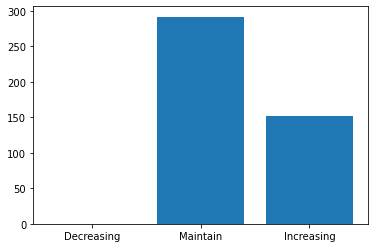

In [14]:
label=['Decreasing','Maintain','Increasing']
values=[count_array[0]/8*100,count_array[1]/355*100,count_array[2]/23*100]

x = np.arange(3)

plt.bar(x, values)
plt.xticks(x, label)

plt.show()

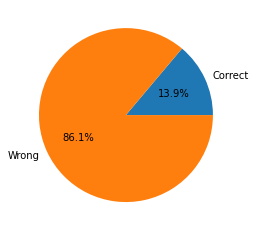

In [15]:
import matplotlib.pyplot as plt

ratio = [count,len(test_y)-count]
labels = ['Correct', 'Wrong']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()